#Task 1

##Importing libraries

In [ ]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

##Data Loading and Preprocessing

In [ ]:
#loading dataset
df = pd.read_csv("/content/movies-mod-sim.csv")
df.head(5)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,index,rating
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,0,0
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,1,0
2,You Will Meet a Tall Dark Stranger,Comedy Drama,Independent,35,1.211818,43,$26.66,2,0
3,When in Rome,Romantic Comedy,Disney,44,0.000000,15,$43.04,3,0
4,What Happens in Vegas,Romantic Comedy,Fox,72,6.267647,28,$219.37,4,0


In [ ]:
# Assuming df is your DataFrame
unique_genre = df['Genre'].nunique()
print("Number of unique Genre:", unique_genre)

# Assuming df is your DataFrame
unique_genre = df['Genre'].unique()
print("Unique Genre:\n", unique_genre)

Number of unique Genre: 25
Unique Genre:
 ['Romance' 'Comedy' 'Comedy Drama' ' Romantic Comedy' 'Drama' 'Animation'
 'Fantasy' 'Romantic Comedy' 'Romence' 'Action' 'Dama'
 'ActionAdventureFiction' 'Adventure Fantasy Action Science Fiction'
 'Fantasy Action Adventure' 'Action Comedy' 'Science Fiction Action'
 'Action Thriller' 'Fantasy Action Science Fiction'
 'Adventure Action Thriller Crime' 'Adventure Fantasy Action'
 'Action Adventure Thriller' 'Action Adventure Fantasy' 'Iron Man 3'
 'Family Fantasy Adventure' ' Action Science Fiction Thriller']


**Need for Data Cleaning**

1. Typo error like (romance-romence , drama- dama)

2. Wrong input - Iron man 3 is not a genre

3. Science Fiction - is not 'science' and 'fiction' its 'Sci-fi'

4. romantic comedy should be romanticcomedy


In [ ]:
# Assuming df is your DataFrame
unique_studios = df['Lead Studio'].nunique()
print("Number of unique lead studios:", unique_studios)
# Assuming df is your DataFrame
unique_studios = df['Lead Studio'].unique()
print("Unique lead studios:\n", unique_studios)

Number of unique lead studios: 19
Unique lead studios:
 ['The Weinstein Company' 'Independent' 'Disney' 'Fox' '20th Century Fox'
 'Warner Bros' 'Summit' 'Paramount' 'Warner Bros.' 'CBS' 'New Line' 'Sony'
 'Universal' 'Lionsgate' 'Paramount Pictures' 'Columbia Pictures'
 'Walt Disney Pictures' 'Sony Pictures Entertainment'
 '20th Century Studios']


**All the unique inputs in the column 'lead studio' should be treated as one token and not individual token.**

**Reasoning :** If we give individual token to each word, few token or vectors  doesnt makes sense like Pictures in ' Sony Picture Entertainment' and 'Walt Disney Pictures' - Pictures is useless token, its misleading.

In [ ]:
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    df['Genre'] = df['Genre'].apply(clean_genres)
    df['Lead Studio'] = df['Lead Studio'].apply(clean_studios)
    df = preprocess_data(df)
    feature_matrix, vectorizer = vectorize_data(df)
    cos_sim = compute_cosine_similarity(feature_matrix)
    return df, cos_sim, vectorizer

def clean_genres(genre):
    if pd.isna(genre):
        return ''
    genre = genre.lower()
    genre = genre.replace('science fiction', 'sci-fi')
    genre = genre.replace('romantic comedy', 'romcom')
    genre = genre.replace('dama', 'drama')
    genre = genre.replace('romence', 'romance')
    genre = genre.replace('actionadventurefiction', 'action adventure fiction')
    genre = " ".join(genre.split())
    return genre

def clean_studios(studio):
    if pd.isna(studio):
        return ''
    studio = studio.lower()
    studio = studio.replace("warnerbros.", "warnerbros")
    studio = studio.replace(".", "")  # Remove periods
    studio = studio.strip().replace(" ", "")  # Remove extra spaces


    return studio




def preprocess_data(df):
    df['combined_features'] = df['Genre'] + ' ' + df['Lead Studio']
    df = df.drop(columns=['Audience score %', 'Profitability', 'Rotten Tomatoes %', 'Worldwide Gross', 'index', 'rating'])
    return df

def custom_tokenizer(text):
    return text.split()

def vectorize_data(df):
    vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
    feature_matrix = vectorizer.fit_transform(df['combined_features'])
    return feature_matrix, vectorizer

def compute_cosine_similarity(feature_matrix):
    cos_sim = cosine_similarity(feature_matrix)
    return cos_sim

if __name__ == "__main__":
    file_path = "/content/movies-mod-sim.csv"
    df, cos_sim, vectorizer = load_and_preprocess_data(file_path)
    print("Data preprocessing and vectorization completed.")
    print("Cosine similarity computation completed.")
    print(df)
    print("Tokens:", vectorizer.get_feature_names_out())


Data preprocessing and vectorization completed.
Cosine similarity computation completed.
                                  Film                      Genre  \
0           Zack and Miri Make a Porno                    romance   
1                      Youth in Revolt                     comedy   
2   You Will Meet a Tall Dark Stranger               comedy drama   
3                         When in Rome                     romcom   
4                What Happens in Vegas                     romcom   
..                                 ...                        ...   
81                             Skyfall  action adventure thriller   
82                        Spider-Man 2   action adventure fantasy   
83    Action Adventure Science Fiction                 iron man 3   
84                 Alice in Wonderland   family fantasy adventure   
85                               X-Men     action sci-fi thriller   

                  Lead Studio  \
0         theweinsteincompany   
1         thewei

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
 # Assuming df is your DataFrame
unique_genre = df['Genre'].nunique()
print("Number of unique Genre:", unique_genre)

# Assuming df is your DataFrame
unique_genre = df['Genre'].unique()
print("Unique Genre:\n", unique_genre)

Number of unique Genre: 22
Unique Genre:
 ['romance' 'comedy' 'comedy drama' 'romcom' 'drama' 'animation' 'fantasy'
 'action' 'action adventure fiction' 'adventure fantasy action sci-fi'
 'fantasy action adventure' 'action comedy' 'sci-fi action'
 'action thriller' 'fantasy action sci-fi'
 'adventure action thriller crime' 'adventure fantasy action'
 'action adventure thriller' 'action adventure fantasy' 'iron man 3'
 'family fantasy adventure' 'action sci-fi thriller']


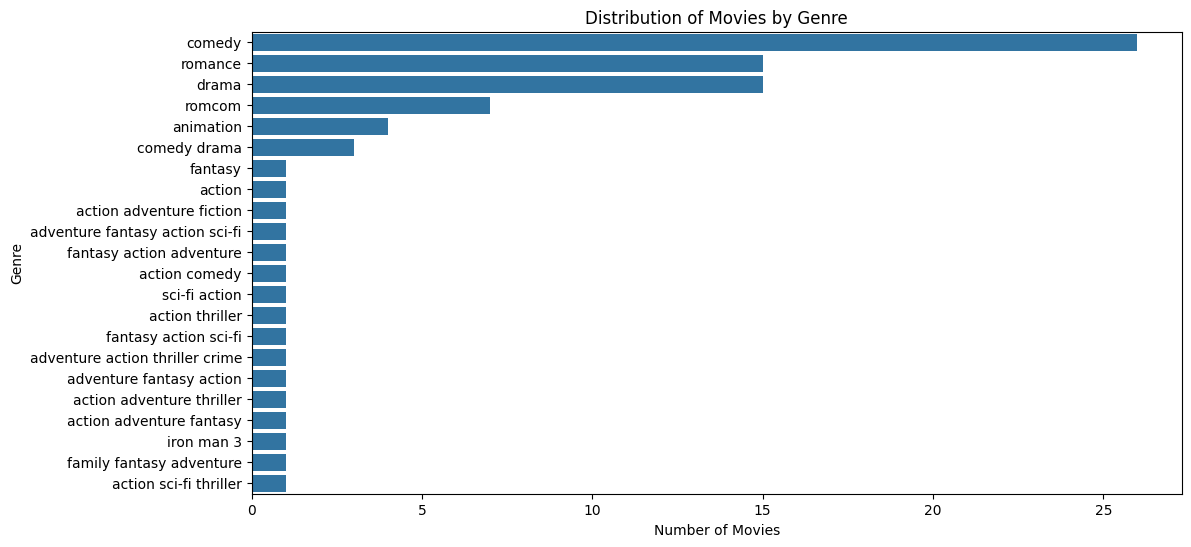

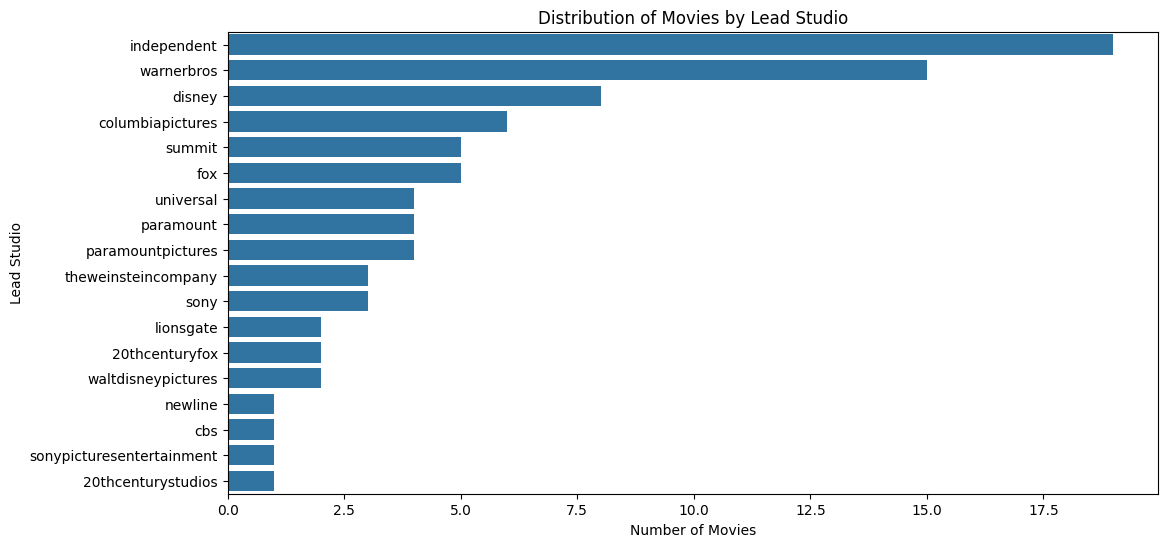

In [ ]:
# prompt: plot 2 chart to show distrution of number of movie based on unique genre and lead studio

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'genre' and 'lead_studio' columns exist in your DataFrame 'df'.
# If not, adjust the column names accordingly.


# Distribution of movies based on unique genres
plt.figure(figsize=(12, 6))
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index)
plt.title('Distribution of Movies by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# Distribution of movies based on unique lead studios
plt.figure(figsize=(12, 6))
sns.countplot(y='Lead Studio', data=df, order=df['Lead Studio'].value_counts().index)
plt.title('Distribution of Movies by Lead Studio')
plt.xlabel('Number of Movies')
plt.ylabel('Lead Studio')
plt.show()


##Compution of Cosine Similarity

In [ ]:
#### AI Generated
def recommend_movies(df, cos_sim, movie_name, top_n=5):
    if movie_name not in df['Film'].values:
        print(f"Movie '{movie_name}' not found in dataset.")
        return

    idx = df[df['Film'] == movie_name].index[0]
    similarity_scores = list(enumerate(cos_sim[idx]))

    # Sort: most similar first (skip the movie itself)
    most_similar = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    least_similar = sorted(similarity_scores, key=lambda x: x[1])[:top_n]

    print(f"\nTop {top_n} MOST similar movies to '{movie_name}':")
    for i, score in most_similar:
        print(f"- {df.iloc[i]['Film']} (Similarity: {score:.2f})")

    print(f"\nTop {top_n} LEAST similar movies to '{movie_name}':")
    for i, score in least_similar:
        print(f"- {df.iloc[i]['Film']} (Similarity: {score:.2f})")


##Running the Program

In [ ]:
if __name__ == "__main__":
    input_movie = input("Enter a movie title: ")
    recommend_movies(df, cos_sim, input_movie, top_n=5)


Enter a movie title: Spider-Man

Top 5 MOST similar movies to 'Spider-Man':
- Spider-Man 2 (Similarity: 1.00)
- Pirates of the Caribbean (Similarity: 0.75)
- Superman Returns (Similarity: 0.67)
- Quantum of Solace (Similarity: 0.67)
- Bad Boys for Life (Similarity: 0.58)

Top 5 LEAST similar movies to 'Spider-Man':
- Zack and Miri Make a Porno (Similarity: 0.00)
- Youth in Revolt (Similarity: 0.00)
- You Will Meet a Tall Dark Stranger (Similarity: 0.00)
- When in Rome (Similarity: 0.00)
- What Happens in Vegas (Similarity: 0.00)


#Task 2

AIM : Building a KNN Classifer based Movie recommendation Model


##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#loading dataset
data = pd.read_csv("/content/Task_2.csv")
data.head(5)

,Film,Comedy,Drama,Romantic,Animation,Romance,Fantasy,Action,Adventure,Fiction,...,Crime,Family,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,index,rating_J,rating_H
0,Zack and Miri Make a Porno,1,0,0,0,0,0,0,0,0,...,0,0,The Weinstein Company,70,1.747542,64,$41.94,0,1,1
1,Youth in Revolt,1,1,1,0,0,0,0,0,0,...,0,0,The Weinstein Company,52,1.090000,68,$19.62,1,1,0
2,You Will Meet a Tall Dark Stranger,1,1,0,0,0,0,0,0,0,...,0,0,Independent,35,1.211818,43,$26.66,2,0,0
3,When in Rome,1,0,1,0,0,0,0,0,0,...,0,0,Disney,44,0.000000,15,$43.04,3,1,0
4,What Happens in Vegas,1,0,1,0,0,0,0,0,0,...,0,0,Fox,72,6.267647,28,$219.37,4,1,1


In [ ]:
#removing 10% of the dataset for later training purpose
data_temp, data_final_test = train_test_split(data, test_size=0.1, random_state=42)

# 2. Save the datasets
data_temp.to_csv("movies_train.csv", index=False)
data_final_test.to_csv("movies_test.csv", index=False)

print("Dataset split complete.")
print("Train set shape:", data_temp.shape)
print("Test set shape:", data_final_test.shape)

Dataset split complete.
Train set shape: (58, 22)
Test set shape: (7, 22)


In [ ]:
data_temp.head(5)

,Film,Comedy,Drama,Romantic,Animation,Romance,Fantasy,Action,Adventure,Fiction,...,Crime,Family,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,index,rating_J,rating_H
12,The Ugly Truth,1,0,1,0,0,0,0,0,0,...,0,0,Independent,68,5.402632,14,$205.30,12,1,0
64,X-Men,0,0,0,0,0,0,1,0,1,...,0,0,20th Century Studios,4,3.100000,44,$11,64,1,1
30,No Reservations,1,0,0,0,0,0,0,0,0,...,0,0,Warner Bros.,64,3.307180,39,$92.60,30,1,0
33,Love Happens,0,1,0,0,0,0,0,0,0,...,0,0,Universal,40,2.004444,18,$36.08,33,1,0
9,Valentine's Day,1,0,1,0,0,0,0,0,0,...,0,0,Warner Bros,54,4.184038,17,$217.57,9,1,0


In [ ]:
# Assuming df is your DataFrame
unique_studios = data_temp['Lead Studio'].nunique()
print("Number of unique lead studios:", unique_studios)
# Assuming df is your DataFrame
unique_studios = data_temp['Lead Studio'].unique()
print("Unique lead studios:\n", unique_studios)

Number of unique lead studios: 16
Unique lead studios:
 ['Independent' '20th Century Studios' 'Warner Bros.' 'Universal'
 'Warner Bros' 'Disney' 'Summit' 'Fox' 'Paramount' 'Walt Disney Pictures'
 'Paramount Pictures' 'Sony' 'Columbia Pictures' 'New Line'
 'The Weinstein Company' 'CBS']


In [ ]:
def load_and_preprocess_data(file_path, target_column):
    data = pd.read_csv(file_path)
    X = data.drop(columns=['Film', 'Lead Studio', 'Audience score %', 'Profitability',
                           'Rotten Tomatoes %', 'Worldwide Gross', 'index', 'rating_J', 'rating_H'])
    y = data[target_column]
    return X, y

def knn_classifier(X_train, y_train, X_val, y_val, k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return y_pred, accuracy, model

def test_evaluate_knn(X, y, k_range=range(1, 11), runs=3):
    all_scores = []
    best_accuracy = 0
    best_model = None
    for i in range(runs):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=i)
        scores = []
        for k in k_range:
            _, accuracy, model = knn_classifier(X_train, y_train, X_val, y_val, k)
            scores.append(accuracy)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model
        all_scores.append(scores)
    avg_scores = np.mean(all_scores, axis=0)
    return list(k_range), avg_scores, best_model

def plot_k_vs_accuracy(k_values, accuracies):
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, accuracies, marker='o', linestyle='-')
    plt.xlabel("k (Number of Neighbors)")
    plt.ylabel("Average Accuracy")
    plt.title("k vs Accuracy for KNN Classifier")
    plt.grid(True)
    plt.show()

def test_model(file_path, target_column, model):
    X, y = load_and_preprocess_data(file_path, target_column)
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    return accuracy, y_pred



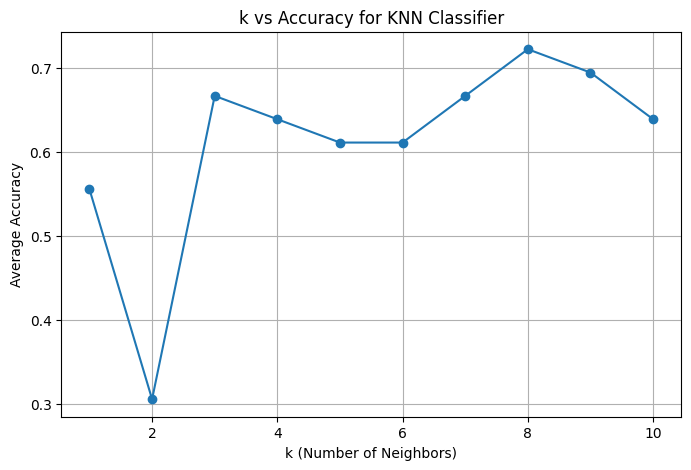

Training evaluation completed.
Test accuracy for best k=8: 0.71

Evaluation Metrics:
--------------------
Accuracy:  0.71
Precision: 0.81
Recall:    0.71
F1 Score:  0.67

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.67      1.00      0.80         4

    accuracy                           0.71         7
   macro avg       0.83      0.67      0.65         7
weighted avg       0.81      0.71      0.67         7



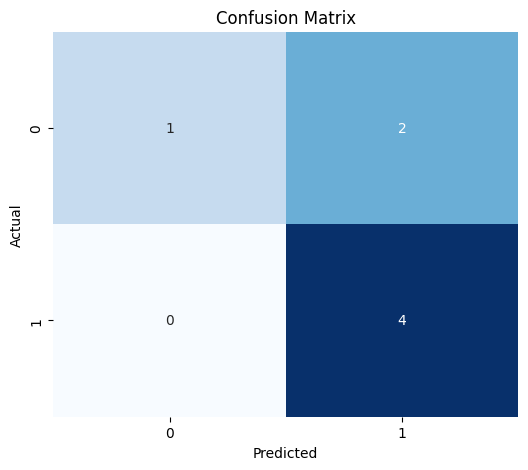

In [ ]:
if __name__ == "__main__":
    import seaborn as sns
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

    # Train and evaluate
    train_file_path = "/content/movies_train.csv"
    target_column = 'rating_J'
    X, y = load_and_preprocess_data(train_file_path, target_column)
    k_range, accuracies, best_model = test_evaluate_knn(X, y)
    plot_k_vs_accuracy(k_range, accuracies)
    print("Training evaluation completed.")

    # Test on unseen data
    test_file_path = "/content/movies_test.csv"
    X_test, y_test = load_and_preprocess_data(test_file_path, target_column)
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    best_k = k_range[np.argmax(accuracies)]
    print(f"Test accuracy for best k={best_k}: {accuracy:.2f}")

    # Evaluation Metrics
    print("\nEvaluation Metrics:")
    print("--------------------")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall:    {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred, average='weighted'):.2f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


Sources :

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

https://naomy-gomes.medium.com/the-cosine-similarity-and-its-use-in-recommendation-systems-cb2ebd811ce1

https://www.youtube.com/watch?v=Gy8t5XIrISc

https://www.datacamp.com/blog/what-is-tokenization

https://github.com/naomyduarteg/LIA-FastAPI-SQL/blob/main/data/data.csv

https://www.mdpi.com/1424-8220/22/13/4904

https://www.w3schools.com/python/ref_string_strip.asp

https://www.youtube.com/watch?v=e9U0QAFbfLI